In [5]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 10)

In [3]:
N = 1000
X, y = make_classification(n_features=2, n_redundant=0, n_samples=N)

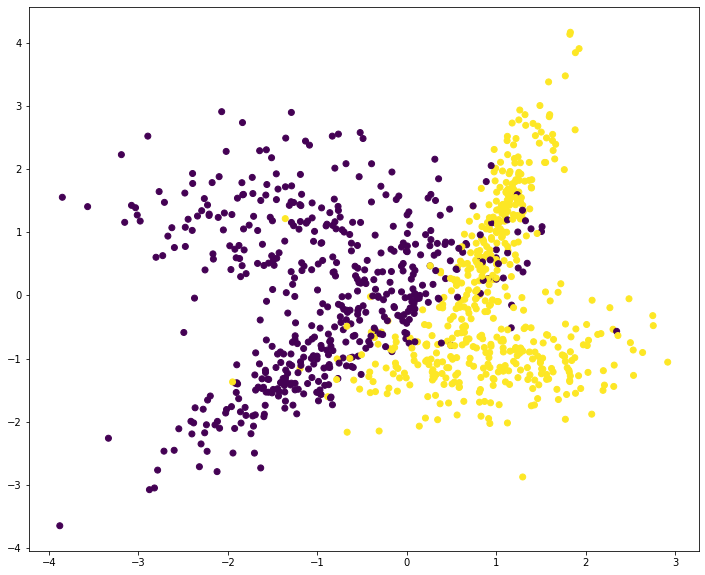

In [6]:
plt.scatter(*X.transpose(), c=y)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [30]:
model = KNeighborsClassifier(n_neighbors=5).fit(X, y)

In [9]:
import numpy

In [10]:
n = 40
xs, ys = [numpy.linspace(X[:,i].min(), X[:,i].max(), 40) for i in (0,1)]

In [11]:
xs

array([-3.87905323, -3.7047375 , -3.53042176, -3.35610603, -3.18179029,
       -3.00747456, -2.83315882, -2.65884309, -2.48452736, -2.31021162,
       -2.13589589, -1.96158015, -1.78726442, -1.61294868, -1.43863295,
       -1.26431721, -1.09000148, -0.91568575, -0.74137001, -0.56705428,
       -0.39273854, -0.21842281, -0.04410707,  0.13020866,  0.30452439,
        0.47884013,  0.65315586,  0.8274716 ,  1.00178733,  1.17610307,
        1.3504188 ,  1.52473454,  1.69905027,  1.873366  ,  2.04768174,
        2.22199747,  2.39631321,  2.57062894,  2.74494468,  2.91926041])

In [12]:
xx, yy = numpy.meshgrid(xs, ys)

In [13]:
xx.size

1600

In [31]:
z = model.predict(numpy.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

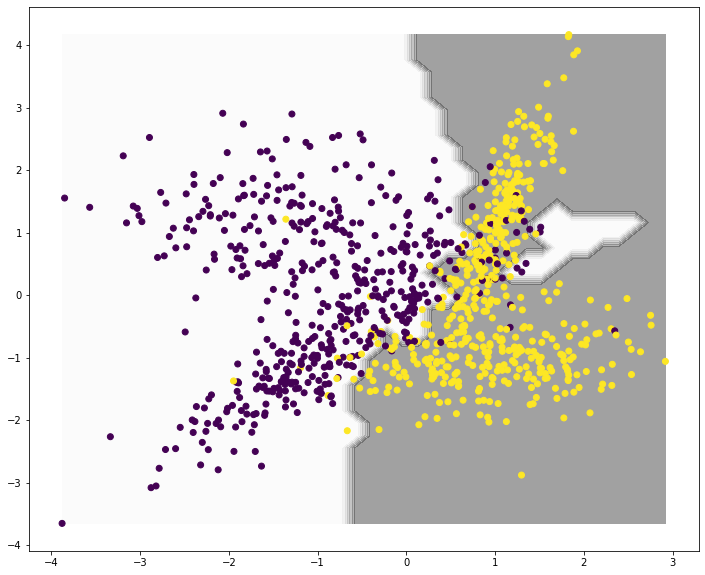

In [32]:
plt.contourf(xx,yy,z, alpha=0.4, cmap='Greys')
plt.scatter(*X.T, c=y)

In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)

array([0.93034826, 0.935     , 0.905     , 0.935     , 0.88442211])

In [23]:
ks = range(5, 50, 5)

In [24]:
scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=5).mean() for k in ks]

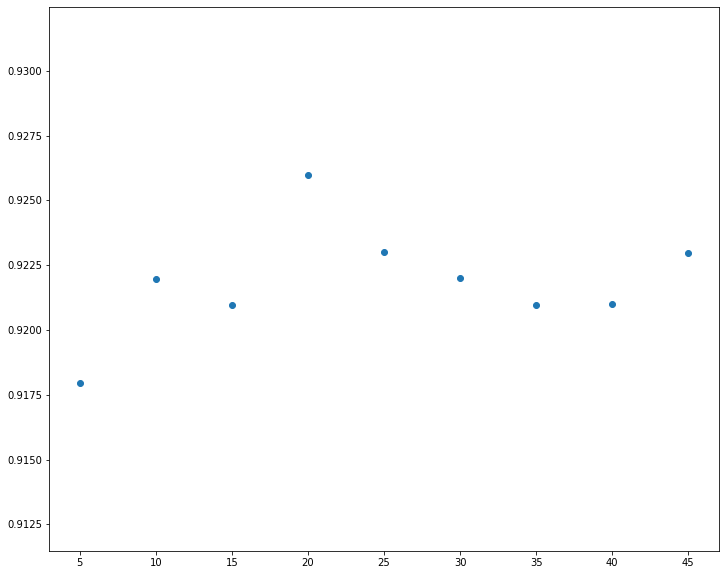

In [26]:
plt.scatter(ks, scores)

In [33]:
full_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), X, y, cv=8) for k in ks]

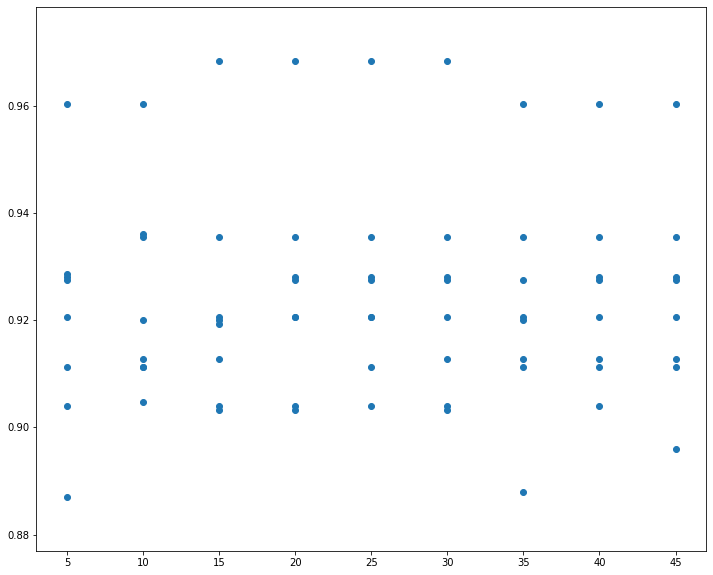

In [34]:
plt.scatter([[k]*8 for k in ks], full_scores)